In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [18]:
df = pd.read_pickle('accidentes.pkl')

In [19]:
df['dia_semana'] = df['fecha'].dt.dayofweek
df['dia_mes'] = df['fecha'].dt.day
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

In [20]:
df['rango_horario'] = pd.to_timedelta(df['rango_horario'])
df['hora'] = df['rango_horario'].dt.components['hours']
df.loc[df['hora'] == 0, 'hora'] = 24

In [21]:
df.head()

,accidente_id,fecha_completa,fecha,rango_horario,localizacion,numero,distrito,coordenada_x,coordenada_y,condicion,...,rango_edad,sexo,tipo_accidente,tipo_vehiculo,victimas,dia_semana,dia_mes,mes,año,hora
0,2010.135,2010-01-01 00:00:00,2010-01-01,0 days 00:00:00,calle de cartagena num ...,104,chamartin,NaN,NaN,desfavorable,...,5.0,hombre,colision doble,turismo,1.0,4,1,1,2010,24
1,2010.135,2010-01-01 00:00:00,2010-01-01,0 days 00:00:00,calle de cartagena num ...,104,chamartin,NaN,NaN,desfavorable,...,12.0,hombre,colision doble,turismo,1.0,4,1,1,2010,24
2,2010.135,2010-01-01 00:00:00,2010-01-01,0 days 00:00:00,calle de cartagena num ...,104,chamartin,NaN,NaN,desfavorable,...,10.0,mujer,colision doble,turismo,1.0,4,1,1,2010,24
3,2010.940,2010-01-01 01:00:00,2010-01-01,0 days 01:00:00,autovia m-30 calzada 2 km. ...,10200,puente de vallecas,NaN,NaN,favorable,...,7.0,mujer,colision multiple,NaN,7.0,4,1,1,2010,1
4,2010.940,2010-01-01 01:00:00,2010-01-01,0 days 01:00:00,autovia m-30 calzada 2 km. ...,10200,puente de vallecas,NaN,NaN,favorable,...,8.0,mujer,colision multiple,NaN,7.0,4,1,1,2010,1


In [22]:
df.shape

(478783, 24)

- **accidente_id:** Identificador único para cada accidente.
- **fecha_completa:** Fecha y hora completa del accidente.
- **fecha:** Fecha del accidente.
- **rango_horario:** Fango horario en el que ocurrió el accidente.
- **localizacion:** Ubicación específica del accidente.
- **numero:** Número asociado con la ubicación del accidente.
- **distrito:** Distrito donde ocurrió el accidente.
- **coordenada_x:** Coordenada X de la ubicación del accidente.
- **coordenada_y:** Coordenada Y de la ubicación del accidente.
- **condicion:** Condiciones en las que ocurrió el accidente (favorable o desfavorable).
- **lesividad:** Nivel de lesión resultante del accidente.
- **persona_implicada:** Persona implicada en el accidente (conductor, pasajero, etc.).
- **positiva_alcohol:** Si la persona implicada dio positivo por alcohol.
- **positiva_droga:** Si la persona implicada dio positivo por drogas.
- **rango_edad:** Rango de edad de la persona implicada.
- **sexo:** Sexo de la persona implicada.
- **tipo_accidente:** Tipo de accidente (colisión doble, colisión múltiple, etc.).
- **tipo_vehiculo:** Tipo de vehículo involucrado en el accidente.
- **victimas:** Número de víctimas involucradas en el accidente.

In [23]:
df.columns

Index(['accidente_id', 'fecha_completa', 'fecha', 'rango_horario',
       'localizacion', 'numero', 'distrito', 'coordenada_x', 'coordenada_y',
       'condicion', 'lesividad', 'persona_implicada', 'positiva_alcohol',
       'positiva_droga', 'rango_edad', 'sexo', 'tipo_accidente',
       'tipo_vehiculo', 'victimas', 'dia_semana', 'dia_mes', 'mes', 'año',
       'hora'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478783 entries, 0 to 478782
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   accidente_id       478783 non-null  float64        
 1   fecha_completa     478783 non-null  datetime64[ns] 
 2   fecha              478783 non-null  datetime64[ns] 
 3   rango_horario      478783 non-null  timedelta64[ns]
 4   localizacion       478783 non-null  object         
 5   numero             478775 non-null  object         
 6   distrito           478775 non-null  object         
 7   coordenada_x       176951 non-null  object         
 8   coordenada_y       176951 non-null  object         
 9   condicion          452103 non-null  object         
 10  lesividad          365297 non-null  object         
 11  persona_implicada  478780 non-null  object         
 12  positiva_alcohol   224988 non-null  float64        
 13  positiva_droga     703 non-nu

Se observsa una gran cantidad de valores Nan's en algunas de las columnas debido a la heterogeneidad de la recogida de muestras entre el rango 2010-2018 y 2019-2024.

In [26]:
df.describe()

,accidente_id,fecha_completa,fecha,rango_horario,positiva_alcohol,positiva_droga,rango_edad,victimas,dia_semana,dia_mes,mes,año,hora
count,478783.000000,478783,478783,478783,224988.000000,703.0,434228.000000,252998.000000,478783.000000,478783.000000,478783.000000,478783.000000,478783.000000
mean,2017.654293,2017-11-28 07:42:12.593681152,2017-11-27 17:36:24.445980672,0 days 14:05:48.147699479,0.029157,1.0,9.451408,1.473478,2.897640,15.761372,6.612254,2017.400463,14.610861
min,2010.100000,2010-01-01 00:00:00,2010-01-01 00:00:00,0 days 00:00:00,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,2010.000000,1.000000
25%,2014.383400,2014-06-06 15:00:00,2014-06-06 00:00:00,0 days 10:00:00,0.000000,1.0,7.000000,1.000000,1.000000,8.000000,4.000000,2014.000000,11.000000
50%,2018.379800,2018-07-12 18:00:00,2018-07-12 00:00:00,0 days 15:00:00,0.000000,1.0,9.000000,1.000000,3.000000,16.000000,7.000000,2018.000000,15.000000
75%,2021.013556,2021-07-28 09:00:00,2021-07-28 00:00:00,0 days 19:00:00,0.000000,1.0,12.000000,2.000000,4.000000,23.000000,10.000000,2021.000000,19.000000
max,2024.006301,2024-01-31 23:00:00,2024-01-31 00:00:00,0 days 23:00:00,1.000000,1.0,17.000000,22.000000,6.000000,31.000000,12.000000,2024.000000,24.000000
std,3.906929,NaN,NaN,0 days 05:40:26.041130089,0.168247,0.0,3.196911,1.076789,1.917557,8.785847,3.533382,4.095148,5.456439


# ACCIDENTE ID 

In [27]:
df["accidente_id"].nunique()

176487

In [28]:
n_accidentes_distrito_año = df.groupby(['distrito', 'año'])['accidente_id'].nunique().reset_index()
n_accidentes_distrito_año

,distrito,año,accidente_id
0,arganzuela,2010,476
1,arganzuela,2011,452
2,arganzuela,2012,455
3,arganzuela,2013,458
4,arganzuela,2014,489
...,...,...,...
310,villaverde,2020,418
311,villaverde,2021,576
312,villaverde,2022,643
313,villaverde,2023,770


In [29]:
n_total_partes_distrito_año = df.groupby(['distrito', 'año'])['accidente_id'].size().reset_index(name='total_accidentes')
n_total_partes_distrito_año = pd.DataFrame(n_total_partes_distrito_año)

In [30]:
fig = px.bar(n_total_partes_distrito_año,
             x      = 'distrito',
             y      = 'total_accidentes',  
             color  = 'año',
             title  = 'Número total de partes por año por distritos',
             height = 700
            )
fig.update_layout(xaxis = {'categoryorder' : 'total descending'}, title_x=0.5)
fig.show()

El número de accidentes es muy bajo en algunos distritos, como Vicalvaro o Barajas, lo cual, hace pensar que quizás no se reportan de forma adecuada todos los accidentes.

In [35]:
numero_accidentes_año = df.groupby(['año'])['accidente_id'].nunique().reset_index()
numero_accidentes_año

,año,accidente_id
0,2010,8295
1,2011,8424
2,2012,8376
3,2013,8425
4,2014,8824
5,2015,8884
6,2016,9333
7,2017,9562
8,2018,9780
9,2019,21934


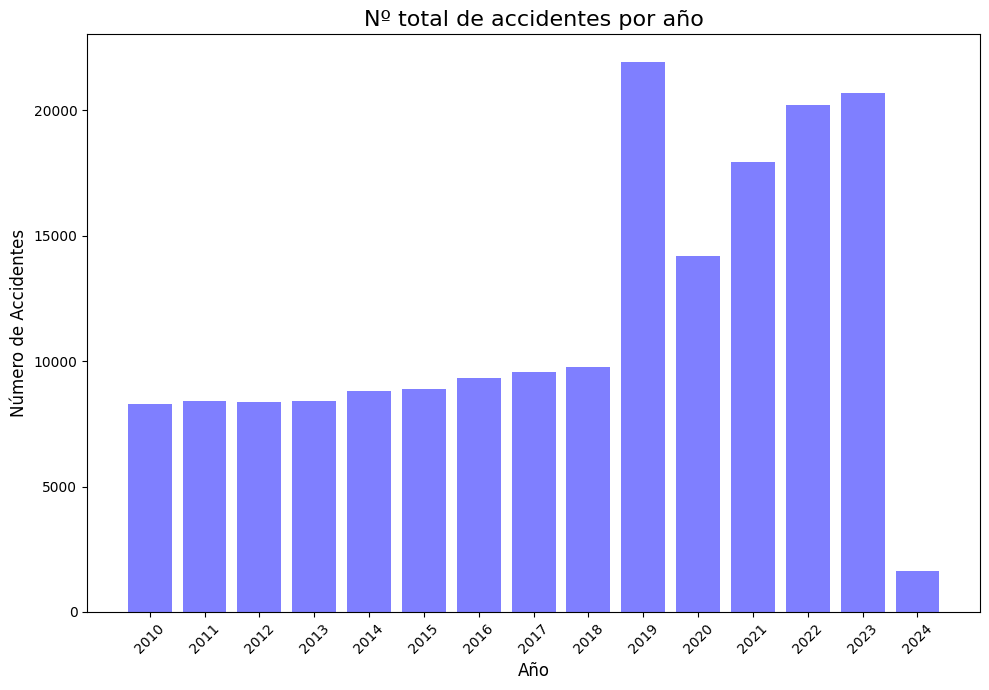

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Ordenar los datos por 'accidente_id' en orden descendente
#numero_accidentes_año = numero_accidentes_año.sort_values(by='accidente_id', ascending=False)
numero_accidentes_año = numero_accidentes_año.sort_values(by='año')
# Crear el gráfico
plt.figure(figsize=(10, 7))
plt.bar(numero_accidentes_año['año'].astype(str),  # Convertir años a cadena para etiquetas
        numero_accidentes_año['accidente_id'],
        color='blue',
        alpha=0.5)  # Ajustar la opacidad

# Personalizar el gráfico
plt.title('Nº total de accidentes por año', fontsize=16, loc='center')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar el recorte de etiquetas
plt.show()


Se observa dos patrones de comportamiento diferentes en la accidentalidad entre los rangos 2010-2018 y 2019-2024.
- Puede que en el segundo rango se comenzara a recoger los detos de diferente manera
- En el 2020 se ve un decrecimiento, potencialmente debido al cofinamiento durante la pandemia.
- Los datos del 2024 (año actual) son muy escasos, por eso su baja accidentalidad

In [38]:
n_accidentes_dia_semana = df.groupby(['dia_semana'])['accidente_id'].nunique().reset_index()
n_accidentes_dia_semana

,dia_semana,accidente_id
0,0,26031
1,1,27655
2,2,28113
3,3,28316
4,4,30803
5,5,22067
6,6,19358


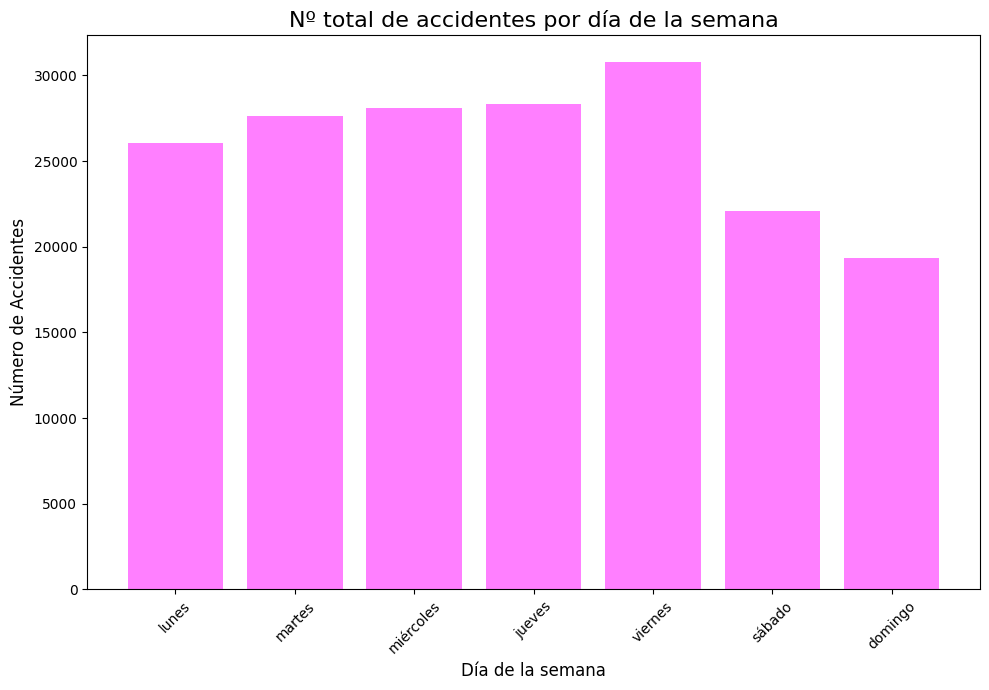

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Mapear números a nombres de días de la semana
dia_semana_labels = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
n_accidentes_dia_semana['dia_semana'] = n_accidentes_dia_semana['dia_semana'].astype(int)

# Crear el gráfico
plt.figure(figsize=(10, 7))
plt.bar(n_accidentes_dia_semana['dia_semana'],
        n_accidentes_dia_semana['accidente_id'],
        color='magenta',
        alpha=0.5)

# Configurar las etiquetas del eje x
plt.xticks(ticks=range(7), labels=dia_semana_labels, rotation=45)

# Personalizar el gráfico
plt.title('Nº total de accidentes por día de la semana', fontsize=16, loc='center')
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)

# Ajustar el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se observa una mayor accidentalidad los viernes y una menor los domingos. Hecho lógicos, los viernes las personas salen de fiesta y los domingos hay menos tráfico.

In [41]:
n_accidentes_hora = df.groupby(['hora'])['accidente_id'].nunique().reset_index(name = 'num_accidentes')
n_accidentes_hora

,hora,num_accidentes
0,1,2890
1,2,2285
2,3,1874
3,4,1658
4,5,1849
5,6,2977
6,7,5144
7,8,8713
8,9,10413
9,10,8351


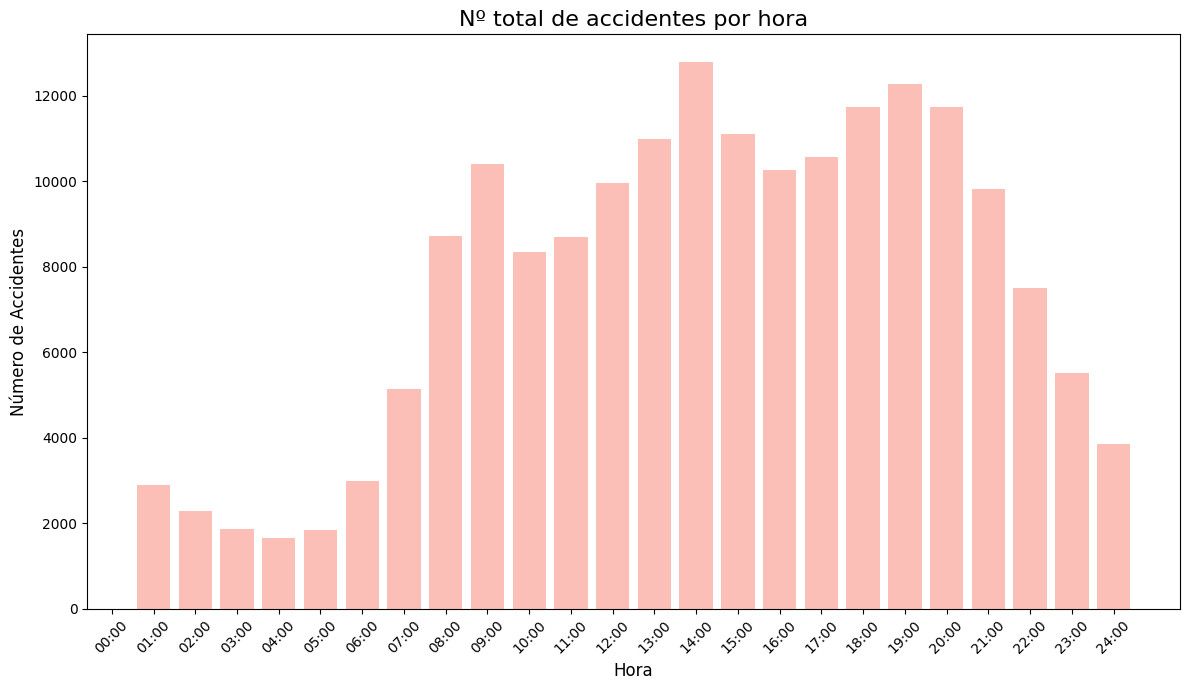

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear el gráfico
plt.figure(figsize=(12, 7))
plt.bar(n_accidentes_hora['hora'],
        n_accidentes_hora['num_accidentes'],
        color='salmon',
        alpha=0.5)

# Configurar las etiquetas del eje x
plt.xticks(ticks=list(range(25)), labels=[f"{hour:02d}:00" for hour in range(25)], rotation=45)

# Personalizar el gráfico
plt.title('Nº total de accidentes por hora', fontsize=16, loc='center')
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)

# Ajustar el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Datos no muy relevantes, muestras efectivamente que a altas horas de la madrugada es cuando occuren menos accidentes, y en hora punta es cuando ocurren más.

In [43]:
n_accidentes_mes = df.groupby(['mes'])['accidente_id'].nunique().reset_index()
n_accidentes_mes

,mes,accidente_id
0,1,15799
1,2,14757
2,3,14960
3,4,13619
4,5,15537
5,6,16199
6,7,14814
7,8,10096
8,9,15380
9,10,17921


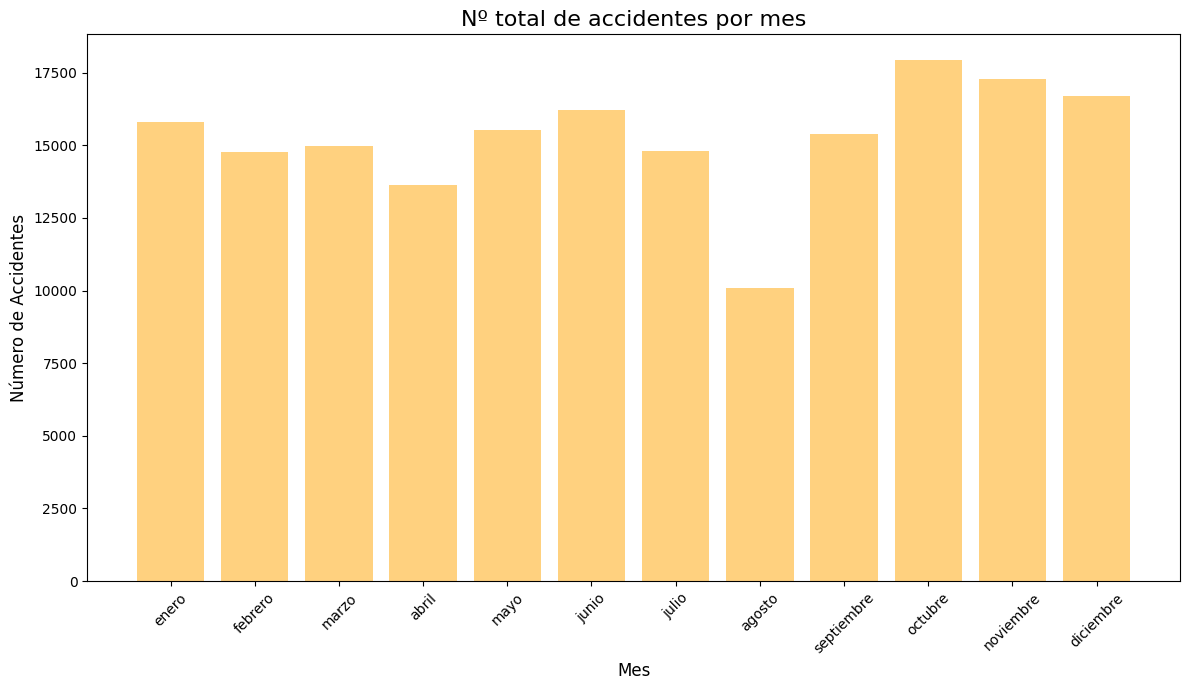

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Nombres de los meses
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

# Crear el gráfico
plt.figure(figsize=(12, 7))
plt.bar(n_accidentes_mes['mes'],
        n_accidentes_mes['accidente_id'],
        color='orange',
        alpha=0.5)

# Configurar las etiquetas del eje x
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45)

# Personalizar el gráfico
plt.title('Nº total de accidentes por mes', fontsize=16, loc='center')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)

# Ajustar el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


La accidentalidad posee cierta homogeneidad en los meses del año, a excepción de Agosto, lo cual, tiene sentido al ser mes vacacional y Madrid estará algo más vacia.

In [45]:
# Días del mes con mayor número de accidentes

n_accidentes_dia_mes = df.groupby(['mes', "dia_mes"])['accidente_id'].nunique().reset_index().sort_values(by=['accidente_id'], ascending=False)
top_15_accidentes_dia_mes= n_accidentes_dia_mes.head(15)
top_15_accidentes_dia_mes

,mes,dia_mes,accidente_id
348,12,14,706
333,11,29,692
353,12,19,683
349,12,15,676
355,12,21,664
298,10,25,663
334,11,30,661
354,12,20,659
295,10,22,650
335,12,1,649


In [46]:
top_15_accidentes_dia_mes['fecha'] = top_15_accidentes_dia_mes['dia_mes'].astype(str) + '/' + top_15_accidentes_dia_mes['mes'].astype(str)
top_15_accidentes_dia_mes

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\2847435477.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mes,dia_mes,accidente_id,fecha
348,12,14,706,14/12
333,11,29,692,29/11
353,12,19,683,19/12
349,12,15,676,15/12
355,12,21,664,21/12
298,10,25,663,25/10
334,11,30,661,30/11
354,12,20,659,20/12
295,10,22,650,22/10
335,12,1,649,1/12


In [49]:
fig = px.bar(data_frame  =  top_15_accidentes_dia_mes,
             x           =  "fecha",
             y           =  "accidente_id",
             opacity     =  0.7,
             title       =  "15 fechas con más accidentes",
             height      =  700,
             color_discrete_sequence=['plum'])

fig.update_layout(title_x=0.5)
fig.show()

In [50]:
n_total_partes_distrito_año = df.groupby(['distrito', 'año'])['accidente_id'].nunique().reset_index(name='total_accidentes')
n_total_partes_distrito_año = pd.DataFrame(n_total_partes_distrito_año)
n_total_partes_distrito_año

,distrito,año,total_accidentes
0,arganzuela,2010,476
1,arganzuela,2011,452
2,arganzuela,2012,455
3,arganzuela,2013,458
4,arganzuela,2014,489
...,...,...,...
310,villaverde,2020,418
311,villaverde,2021,576
312,villaverde,2022,643
313,villaverde,2023,770


In [51]:
# Cambiamos año a string para poder iterar sobre los años en el gráfico

n_accidentes_distrito_año["año"] = n_accidentes_distrito_año["año"].astype(str)

In [52]:
fig = px.bar(n_accidentes_distrito_año,
             x      = 'distrito',
             y      = 'accidente_id',  
             color  = 'año',
             title  = 'Número de accidentes por año por distritos',
             height = 700
            )
fig.update_layout(xaxis = {'categoryorder' : 'total descending'}, title_x=0.5)
fig.show()

Mismo gráfico que el de más arriba, no aporta más información. Solo nos permite observar los diferentes rangos de accidentalidad por fechas y distritos.

# DROGAS Y ALCOHOL

In [53]:
df.columns

Index(['accidente_id', 'fecha_completa', 'fecha', 'rango_horario',
       'localizacion', 'numero', 'distrito', 'coordenada_x', 'coordenada_y',
       'condicion', 'lesividad', 'persona_implicada', 'positiva_alcohol',
       'positiva_droga', 'rango_edad', 'sexo', 'tipo_accidente',
       'tipo_vehiculo', 'victimas', 'dia_semana', 'dia_mes', 'mes', 'año',
       'hora'],
      dtype='object')

In [54]:
nan_drogas = df["positiva_droga"].isna().sum()
realizado_test_droga = df.shape[0] - df["positiva_droga"].isna().sum()

print("Número de NaN en drogas:", nan_drogas)
print("Número de veces que se realizó el test de drogas:", realizado_test_droga)

Número de NaN en drogas: 478080
Número de veces que se realizó el test de drogas: 703


In [55]:
df["positiva_droga"].unique()

array([nan,  1.])

In [56]:
df["positiva_alcohol"].unique()

array([nan,  0.,  1.])

Se empezó a registrar desde 2019 hasta 2024 los positivos

In [57]:
# los valores totales de positivos, negativos y nan en alcohol teniendo en cuenta todos los años

n_valores_alcohol_totales = df["positiva_alcohol"].value_counts(dropna=False)
n_valores_alcohol_totales

positiva_alcohol
NaN    253795
0.0    218428
1.0      6560
Name: count, dtype: int64

In [58]:
# Cuando empieza a haber registros de alcohol y drogas, a contemplarse esa variable 

df_con_alcohol = df[df['año'] >= 2019]
numero_valores_alcohol = df_con_alcohol["positiva_alcohol"].value_counts(dropna=False)
numero_valores_alcohol

positiva_alcohol
0.0    218428
1.0      6560
NaN       797
Name: count, dtype: int64

In [59]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]], subplot_titles=("Antes del registro", "Desde que hay registros"))

fig.add_trace(
    go.Pie(values=n_valores_alcohol_totales, labels=n_valores_alcohol_totales.index, name="Antes del registro"),
    row=1, col=1)

fig.add_trace(
    go.Pie(values=numero_valores_alcohol, labels=numero_valores_alcohol.index, name="Desde que hay registros", rotation = 90),
    row=1, col=2)

fig.update_layout(title="Porcentajes de positivos en alcohol", title_x=0.5)
fig.show()


In [60]:
positivo_droga_sexo = df[df["positiva_droga"] == 1].groupby(["sexo"]).size()
positivo_droga_sexo

sexo
hombre    643
mujer      60
dtype: int64

In [62]:
positivo_alcohol_sexo = df[df["positiva_alcohol"] == 1].groupby(["sexo"]).size()
positivo_alcohol_sexo

sexo
hombre    5616
mujer      944
dtype: int64

In [63]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]], subplot_titles=("Droga", "Alcohol"))

fig.add_trace(
    go.Pie(values=positivo_droga_sexo, labels=positivo_droga_sexo.index, name="Droga"),
    row=1, col=1)

fig.add_trace(
    go.Pie(values=positivo_alcohol_sexo, labels=positivo_alcohol_sexo.index, name="Alcohol"),
    row=1, col=2)

fig.update_layout(title="Porcentajes positivos por sexo", title_x=0.5)
fig.show()


In [64]:
positivo_alcohol_edad = df[df["positiva_alcohol"] == 1].groupby(["rango_edad"]).size().reset_index(name="numero_positivos")
positivo_alcohol_edad = positivo_alcohol_edad.sort_values(by='numero_positivos', ascending=False)
positivo_alcohol_edad

,rango_edad,numero_positivos
3,7.0,1024
6,10.0,846
5,9.0,809
4,8.0,784
2,6.0,729
7,11.0,722
8,12.0,641
9,13.0,358
10,14.0,243
1,5.0,206


In [65]:
fig = px.bar(data_frame     = positivo_alcohol_edad,
             x              = "rango_edad",
             y              = "numero_positivos",
             opacity        = 0.5,
             title          = "Nº de positivos en alcohol por rangos de edad",
             height         = 700,
             color_discrete_sequence=['olivedrab']
            )
fig.update_layout(xaxis={'title'   : 'Rangos',
                         'tickmode': 'array', 
                         'tickvals': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
                         'ticktext': ["15-17", "18-20", "21-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "+74"]},
                  title_x=0.5)

fig.show()

In [66]:
# Cuando empieza a haber registros de alcohol y drogas, a contemplarse esa variable 
df_drogas_alcohol= df[["accidente_id", "año", "positiva_droga", "positiva_alcohol", "dia_semana", "rango_horario", "sexo"]]
df_drogas_alcohol = df_drogas_alcohol[df_drogas_alcohol['año'] >= 2019]

df_drogas_alcohol

,accidente_id,año,positiva_droga,positiva_alcohol,dia_semana,rango_horario,sexo
252998,2018.017842,2019,NaN,0.0,0,0 days 09:00:00,hombre
252999,2018.017842,2019,NaN,0.0,0,0 days 09:00:00,mujer
253000,2019.000001,2019,NaN,1.0,1,0 days 03:00:00,hombre
253001,2019.000001,2019,NaN,0.0,1,0 days 03:00:00,mujer
253002,2019.000001,2019,NaN,0.0,1,0 days 03:00:00,mujer
...,...,...,...,...,...,...,...
478778,2024.004705,2024,NaN,0.0,2,0 days 09:00:00,hombre
478779,2024.004705,2024,NaN,0.0,2,0 days 09:00:00,mujer
478780,2024.005341,2024,NaN,0.0,5,0 days 13:00:00,mujer
478781,2024.005341,2024,NaN,0.0,5,0 days 13:00:00,hombre


In [67]:
distritos = df['distrito'].unique()

distritos

array(['chamartin', 'puente de vallecas', 'chamberi', 'retiro',
       'salamanca', 'carabanchel', 'ciudad lineal', 'moncloa-aravaca',
       'tetuan', 'villa de vallecas', 'moratalaz', 'arganzuela',
       'san blas-canillejas', 'villaverde', 'hortaleza',
       'fuencarral-el pardo', 'vicalvaro', 'usera', 'latina', 'barajas',
       'centro', nan], dtype=object)

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




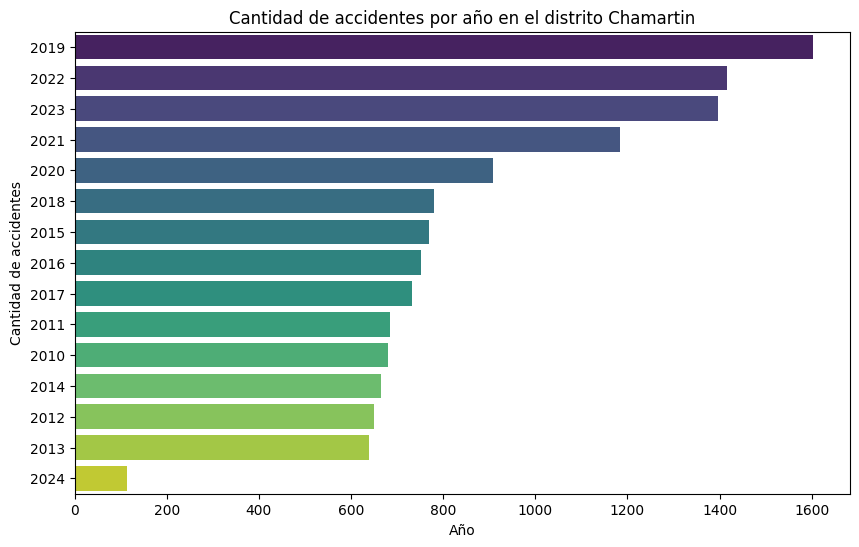

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




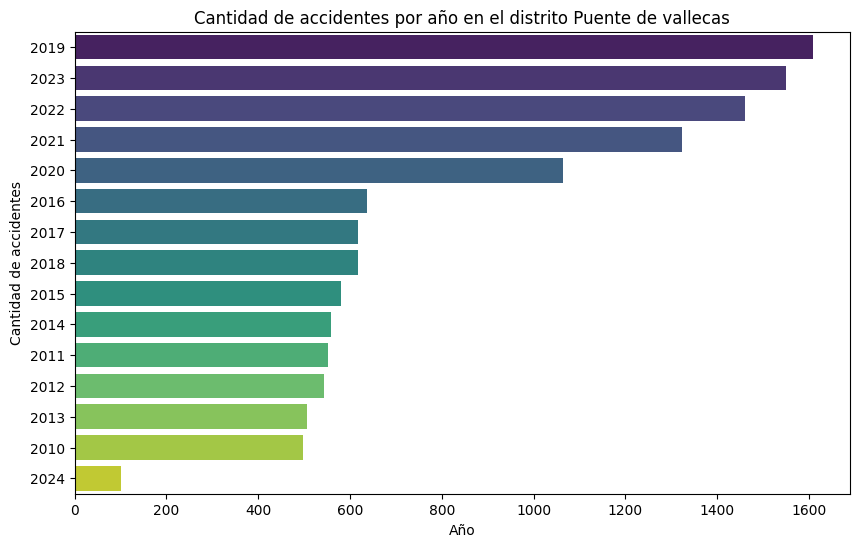

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




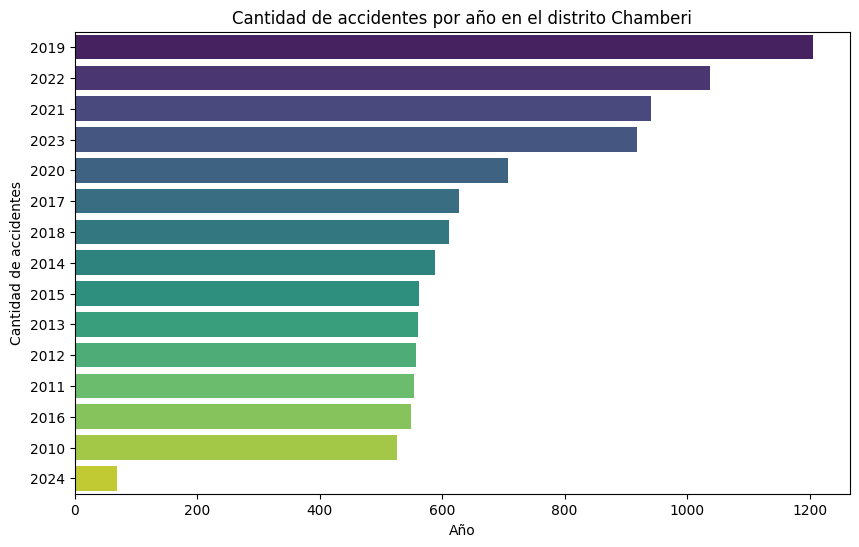

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




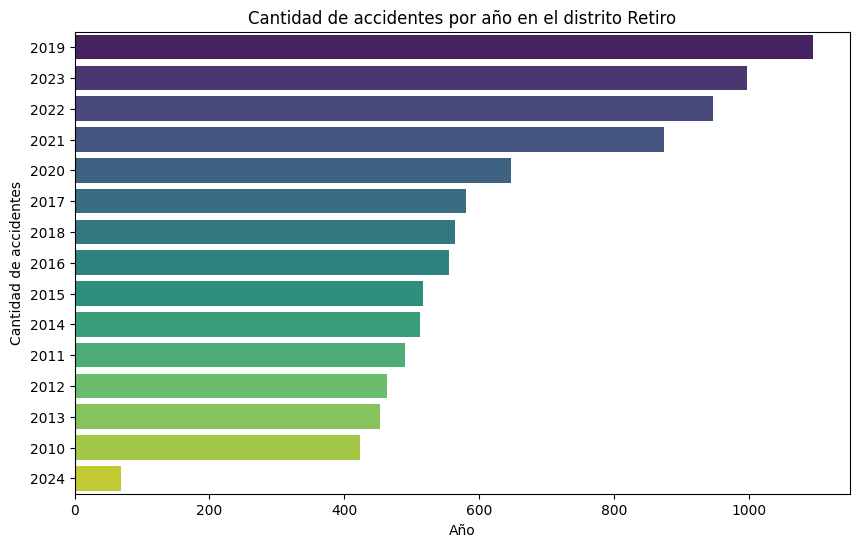

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




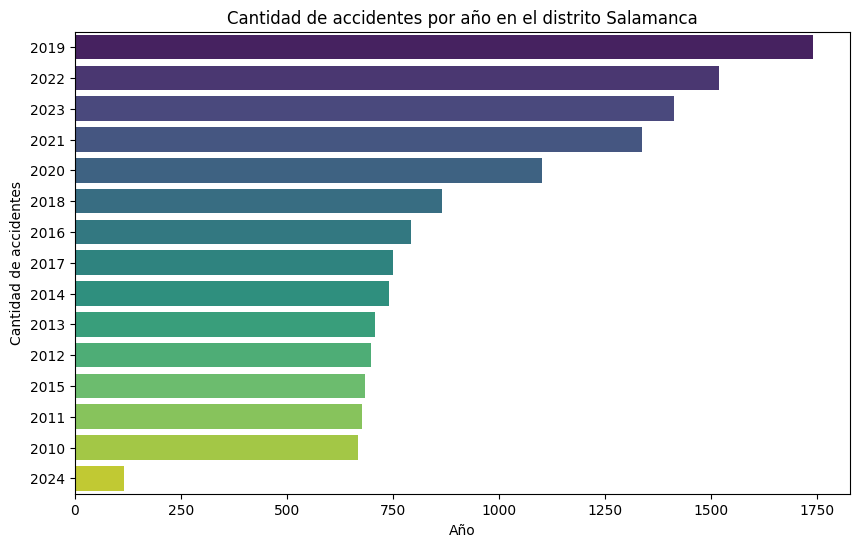

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




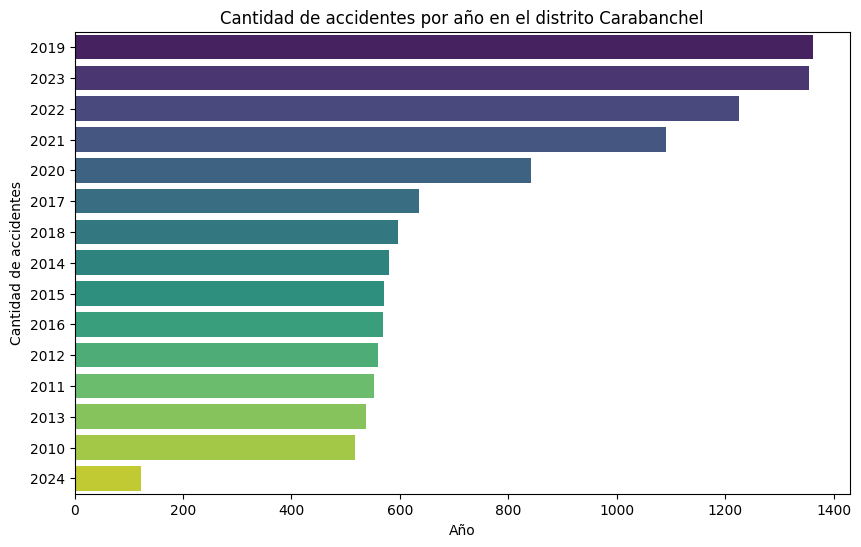

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




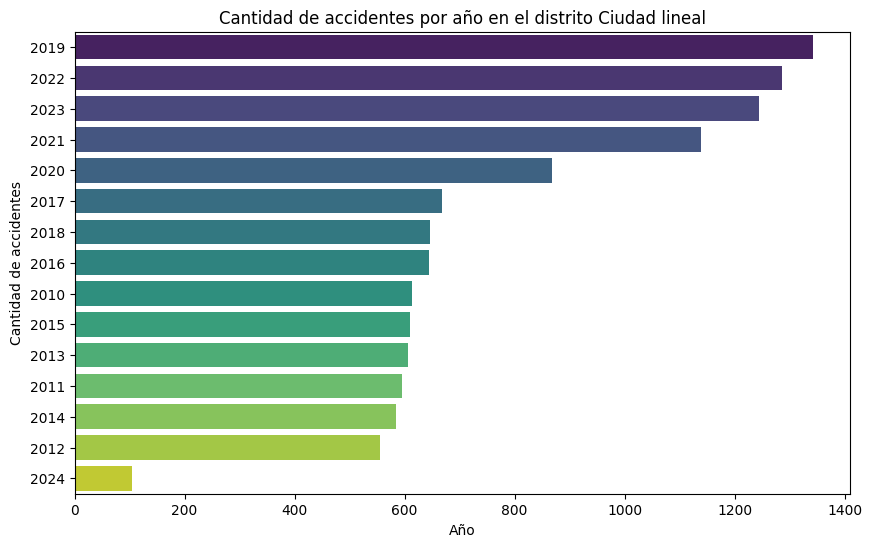

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




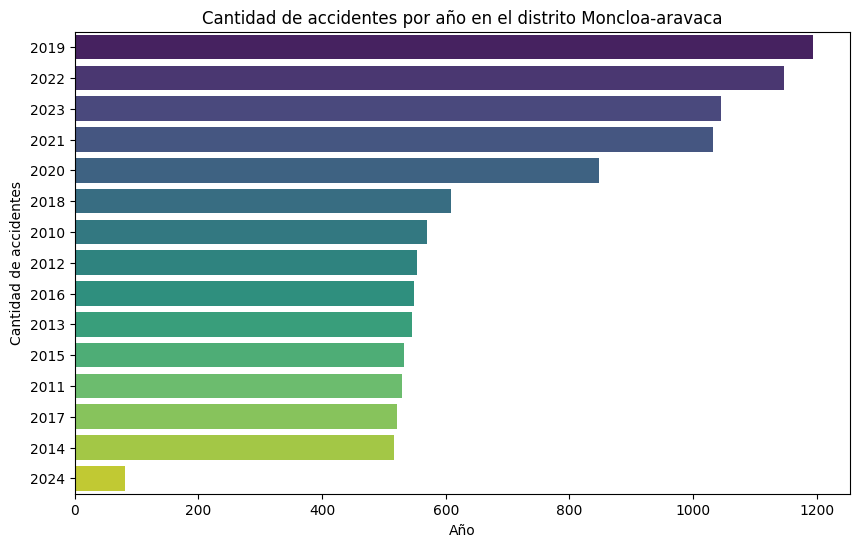

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




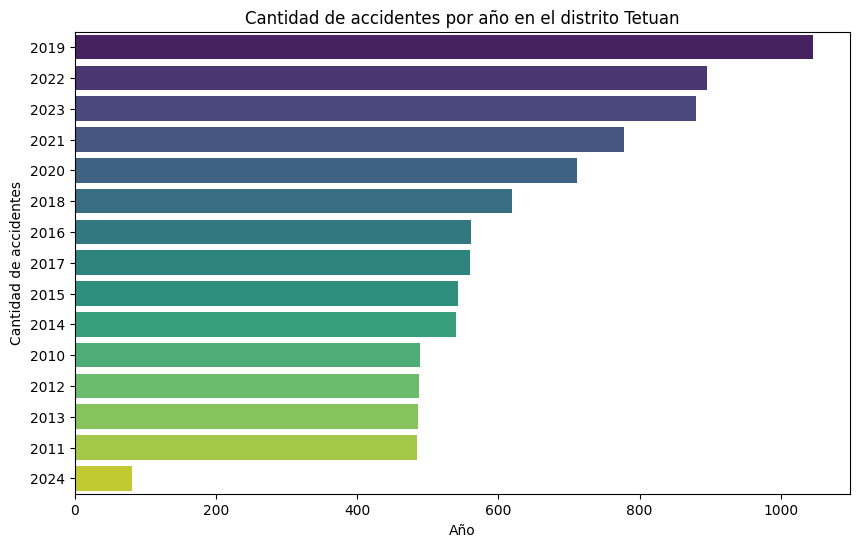

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




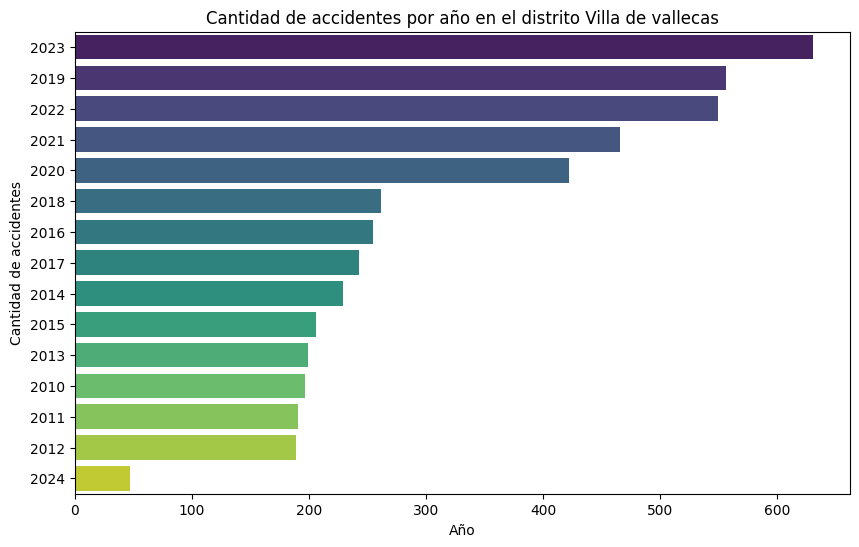

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




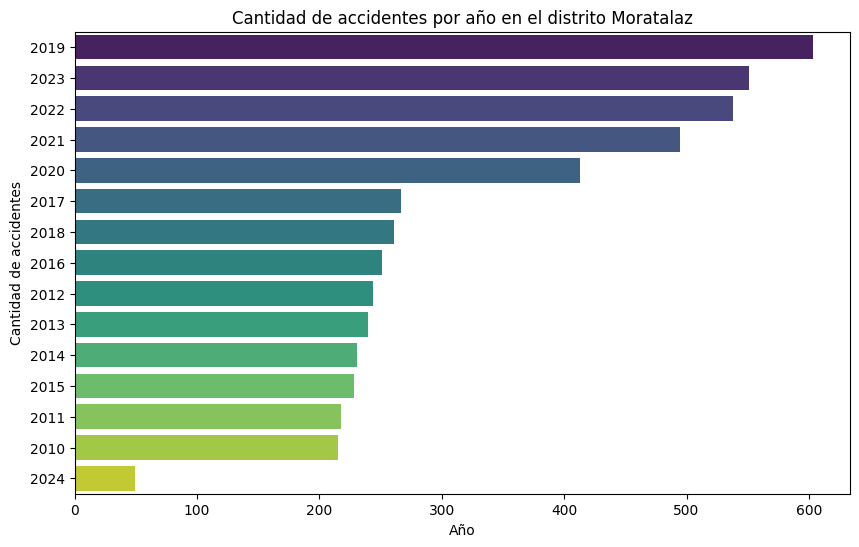

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




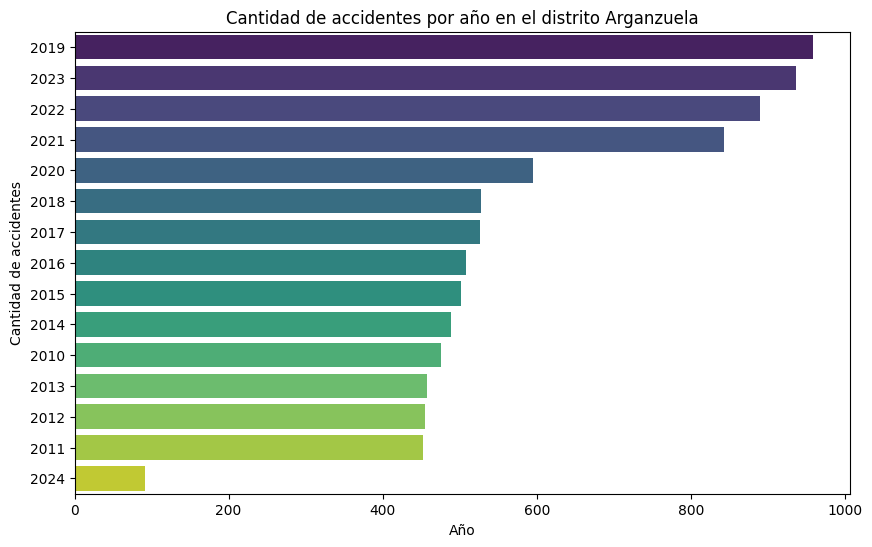

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




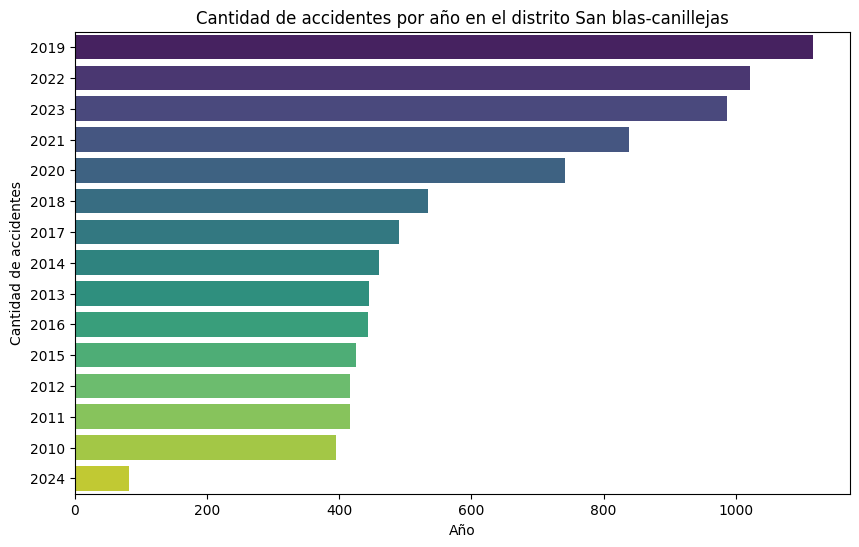

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




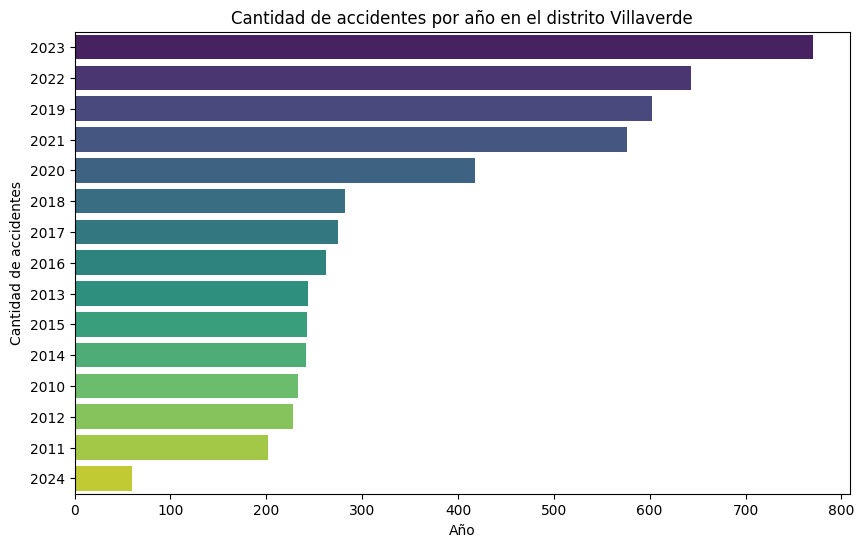

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




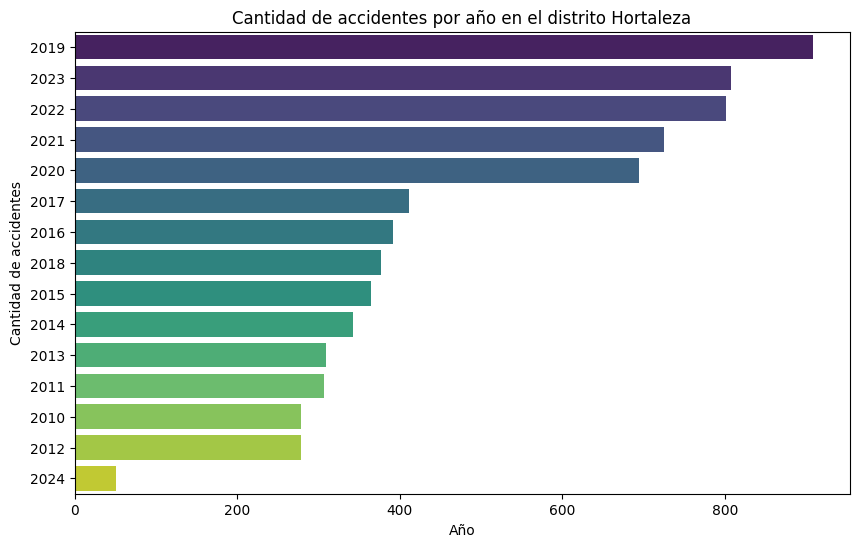

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




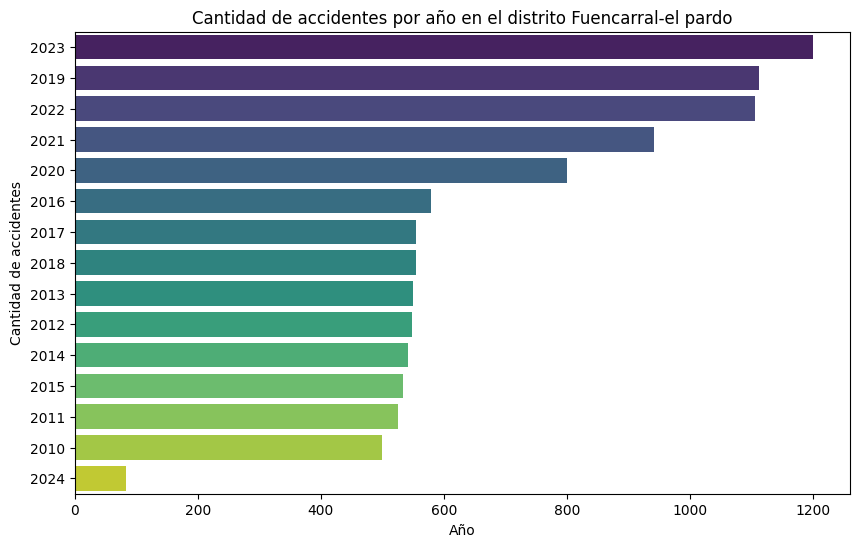

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




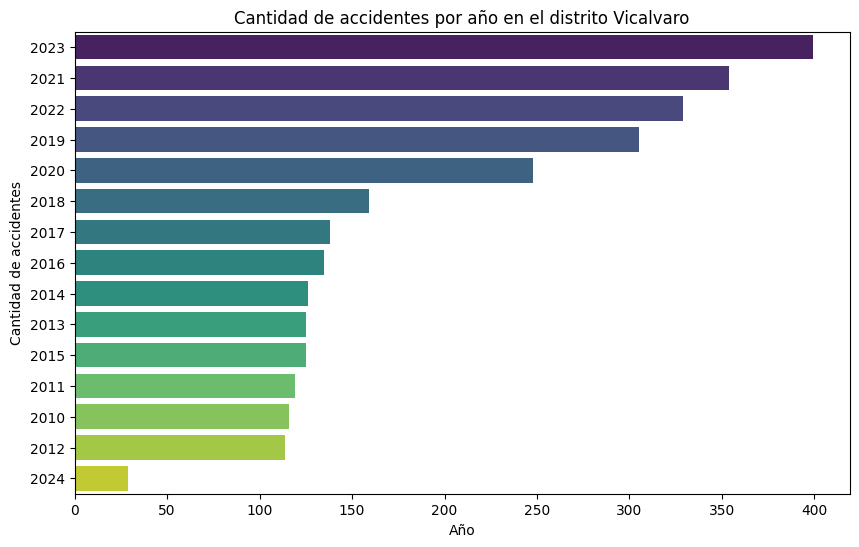

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




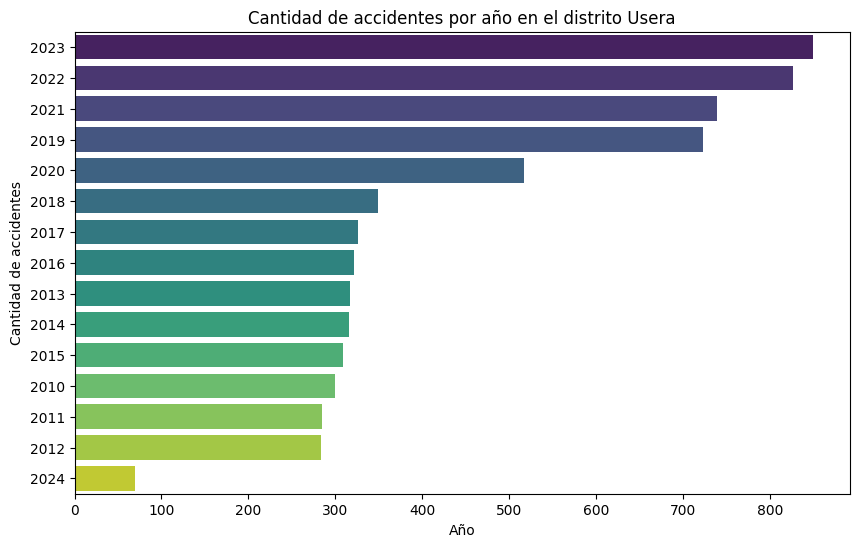

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




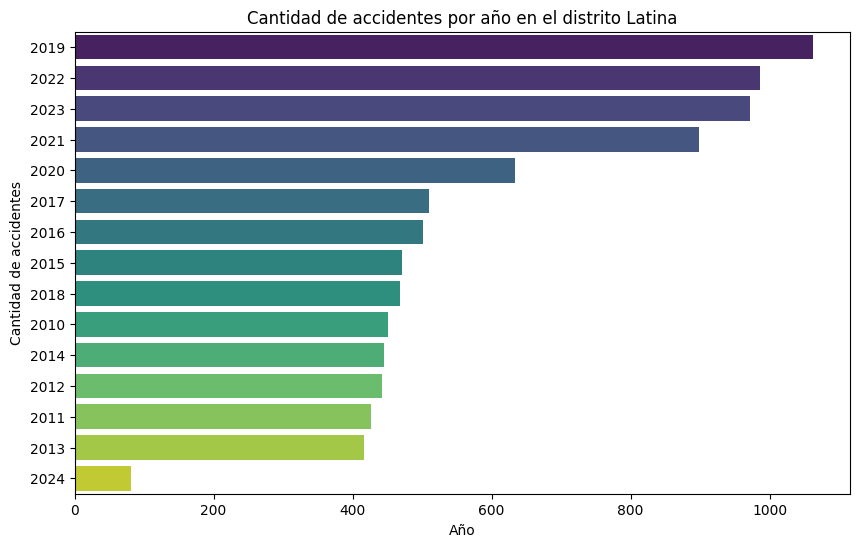

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




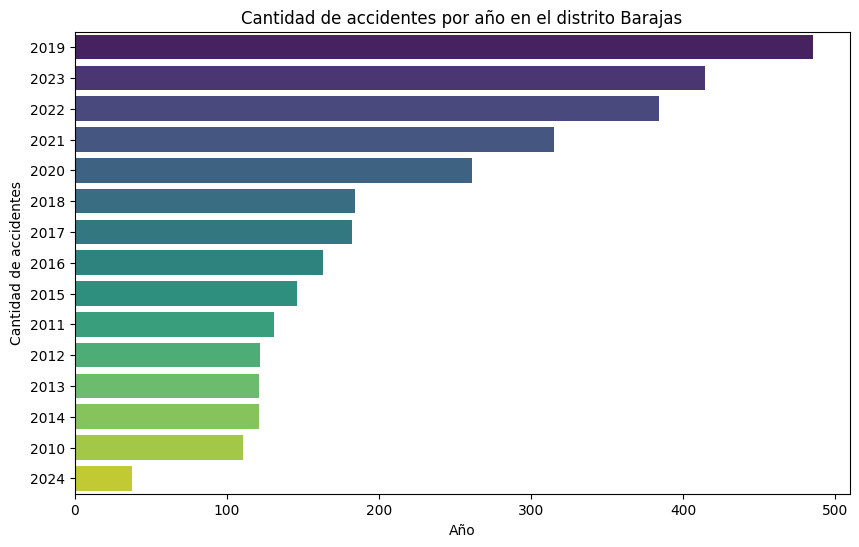

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_378152\130263017.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




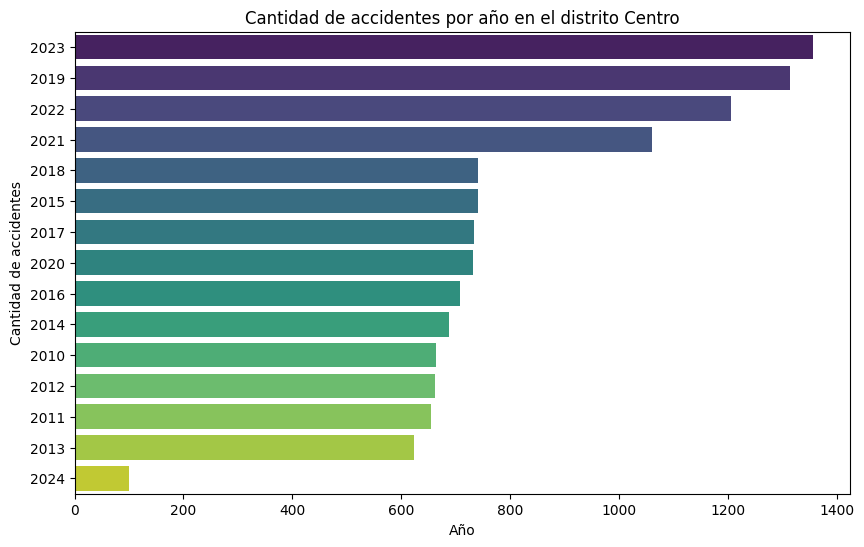

In [68]:
distritos = df.groupby([df['distrito'], df['fecha'].dt.year])['accidente_id'].nunique().reset_index(name='count')

# Bucle para visualizar la accidentalidad por año y distrito
for distrito in df['distrito'].unique()[:-1]:
    distrito_data = distritos[distritos['distrito'] == distrito].sort_values(by='count', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(y='fecha', x='count', data=distrito_data, orient='h', order=distrito_data.sort_values('count', ascending=False)['fecha'], palette='viridis')
    plt.title(f'Cantidad de accidentes por año en el distrito {distrito.capitalize()}')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de accidentes')
    plt.show()


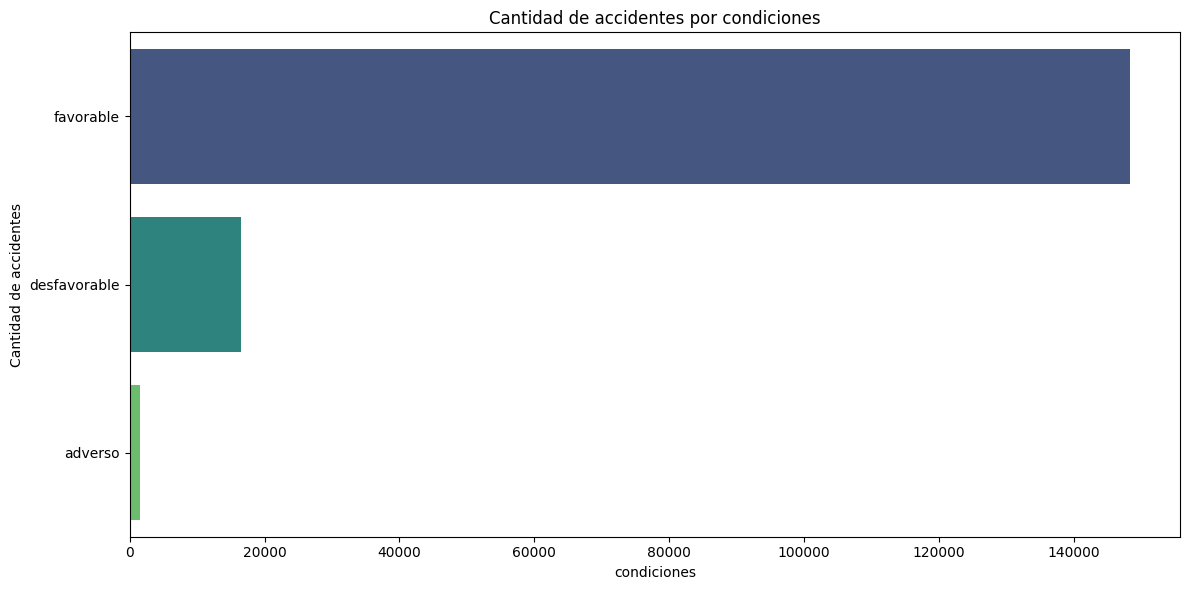

In [69]:
condiciones = df.groupby('condicion')['accidente_id'].nunique().reset_index().sort_values(by= 'accidente_id', ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x = 'accidente_id', y = 'condicion', data = condiciones, hue = 'condicion', palette = 'viridis')

plt.title('Cantidad de accidentes por condiciones')
plt.xlabel('condiciones')
plt.ylabel('Cantidad de accidentes')
plt.tight_layout()

plt.show()

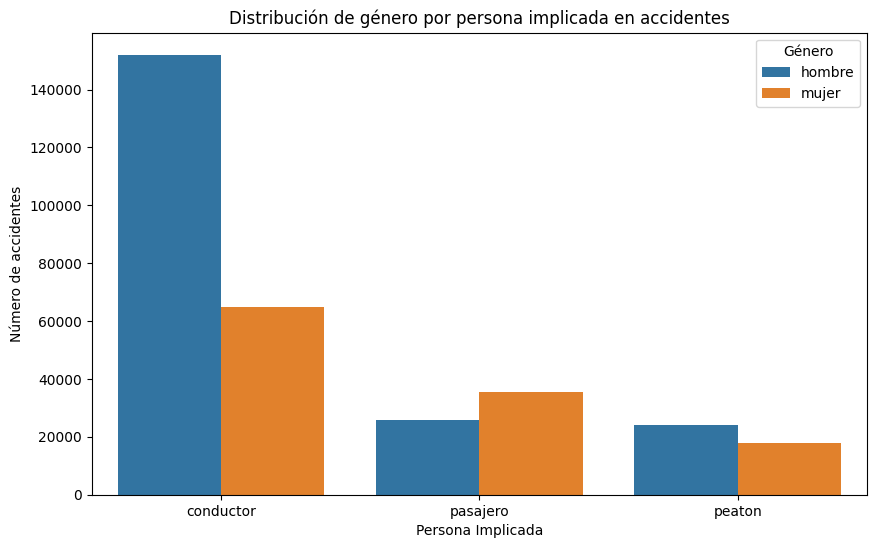

In [70]:
grupo_persona_sexo = df.groupby(['persona_implicada', 'sexo'])['accidente_id'].nunique().reset_index(name = 'count')
plt.figure(figsize = (10, 6))
sns.barplot(data = grupo_persona_sexo, x ='persona_implicada', y='count', hue = 'sexo')
plt.title('Distribución de género por persona implicada en accidentes')
plt.xlabel('Persona Implicada')
plt.ylabel('Número de accidentes')
plt.legend(title='Género')
plt.show()

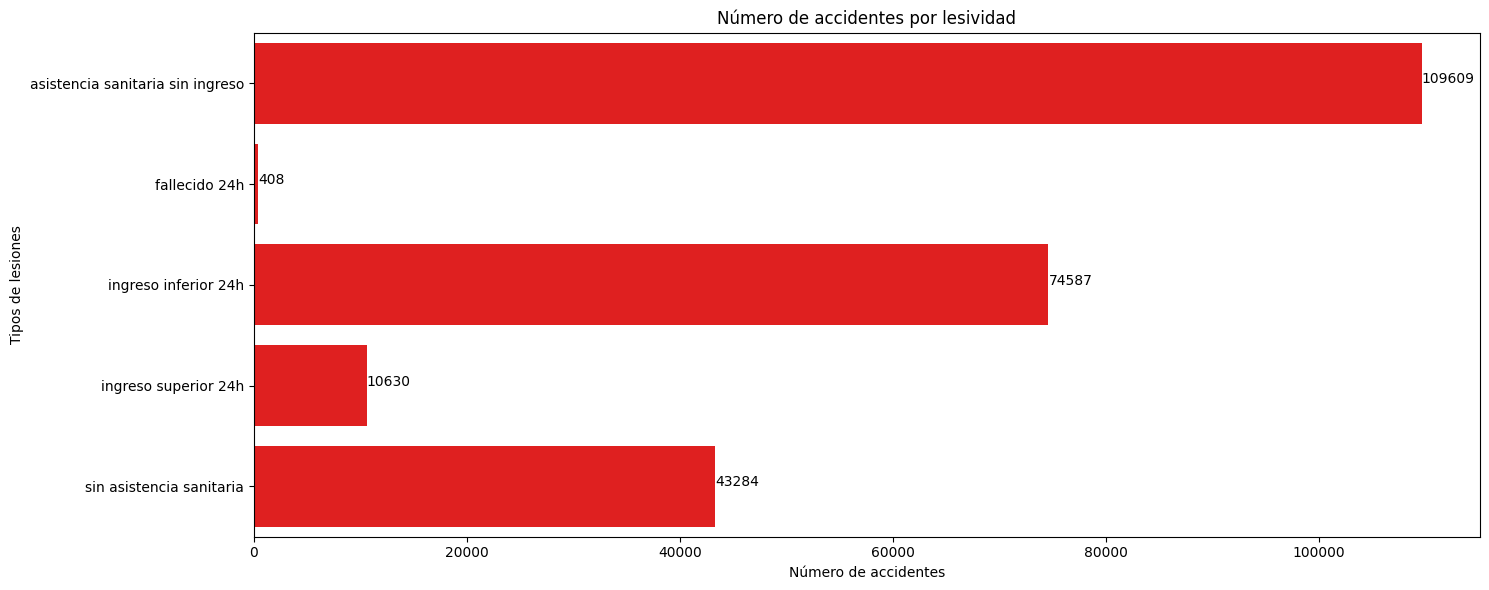

In [71]:
lesividad = df.groupby('lesividad')['accidente_id'].nunique().reset_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(y=lesividad['lesividad'], x=lesividad['accidente_id'], color='red')

# Agregar el número en cada barra
for index, value in enumerate(lesividad['accidente_id']):
    ax.text(value, index, str(value), color='black', ha="left")

plt.title('Número de accidentes por lesividad')
plt.xlabel('Número de accidentes')
plt.ylabel('Tipos de lesiones')
plt.tight_layout()
plt.show()

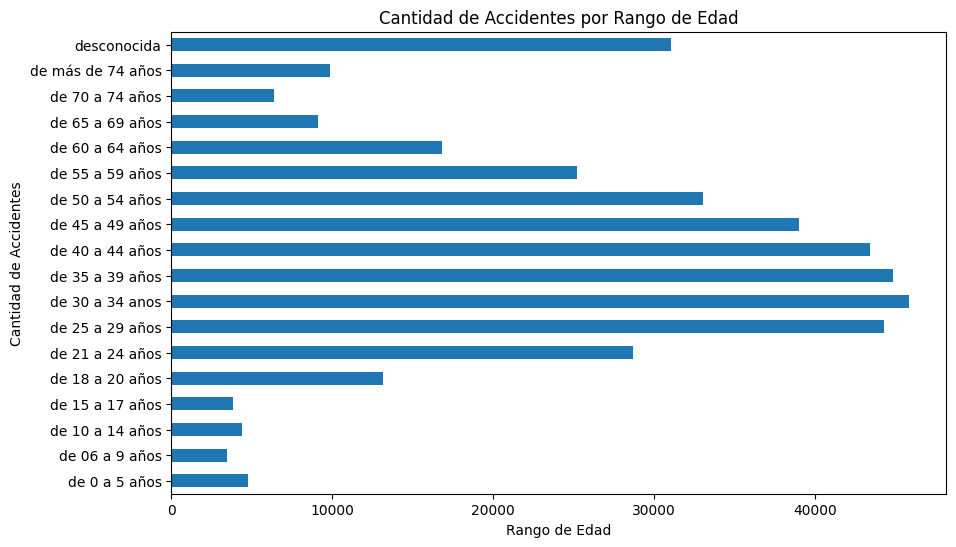

In [72]:
diccionario_edades = {
         1 : 'menor de 5 años',
         1 : 'de 0 a 5 años',
         2 : 'de 06 a 9 años',
         3 : 'de 10 a 14 años',
         4 : 'de 15 a 17 años',
         5 : 'de 18 a 20 años',
         6 : 'de 21 a 24 años',
         7 : 'de 25 a 29 años',
         8 : 'de 30 a 34 años',
         8 : 'de 30 a 34 anos',
         9 : 'de 35 a 39 años',
        10 : 'de 40 a 44 años',
        11 : 'de 45 a 49 años',
        12 : 'de 50 a 54 años',
        13 : 'de 55 a 59 años',
        14 : 'de 60 a 64 años',
        15 : 'de 65 a 69 años',
        16 : 'de 70 a 74 años',
        17 : 'mas de 74 años',
        17 : 'de mas de 74 años ',
        17 : 'de más de 74 años',
    np.nan : 'desconocido',
    np.nan : 'desconocida'
}

df['rango_edad'] = df['rango_edad'].map(diccionario_edades)
accidentes_por_edad = df.groupby('rango_edad')['accidente_id'].nunique()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_edad.plot(kind='barh')
plt.title('Cantidad de Accidentes por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Accidentes')

plt.show()

<Figure size 1000x600 with 0 Axes>

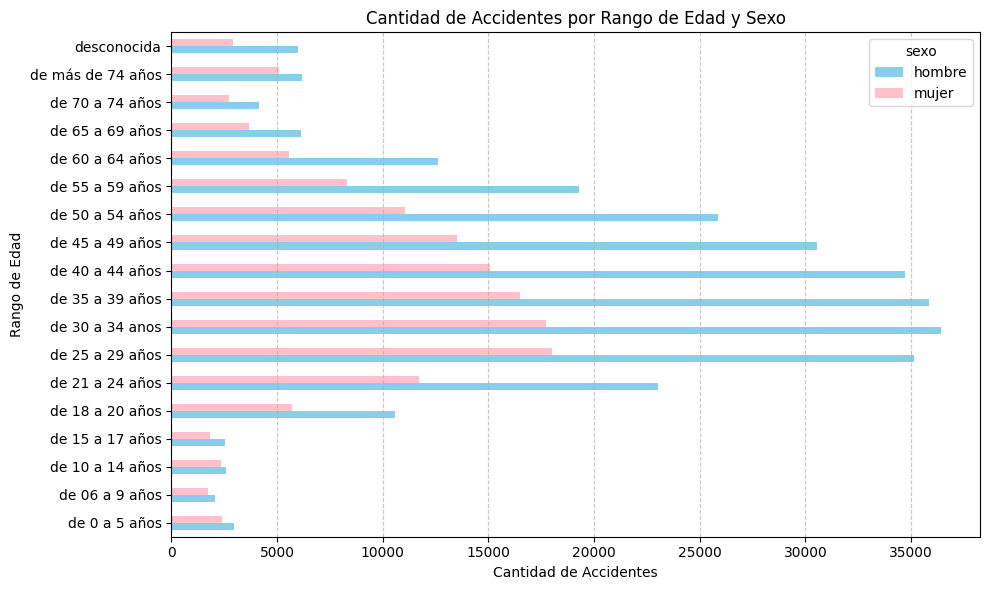

In [73]:
accidentes_por_edad_sexo = df.groupby(['rango_edad', 'sexo'])['accidente_id'].count().unstack()
plt.figure(figsize = (10, 6))
accidentes_por_edad_sexo.plot(kind = 'barh', color = ['skyblue', 'pink'], figsize = (10,6))
plt.title('Cantidad de Accidentes por Rango de Edad y Sexo')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Rango de Edad')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout()

In [74]:
df.groupby(["fecha", "accidente_id", "distrito"]).size().reset_index(name='num_accidentes')

,fecha,accidente_id,distrito,num_accidentes
0,2010-01-01,2010.135000,chamartin,3
1,2010-01-01,2010.172000,salamanca,3
2,2010-01-01,2010.193000,ciudad lineal,1
3,2010-01-01,2010.195000,moncloa-aravaca,1
4,2010-01-01,2010.203000,salamanca,4
...,...,...,...,...
183392,2024-01-31,2024.003626,centro,5
183393,2024-01-31,2024.003632,chamartin,3
183394,2024-01-31,2024.003645,fuencarral-el pardo,2
183395,2024-01-31,2024.003670,moratalaz,2


# Conclusiones

Más allá del número de accidentes, los datos no aportan unos datos significativos para el estudio de predicciones de accidentes.
A simple vista podemos ver que sería en Octubre el mes con mayor frecuencia de accidentes, junto con los viernes, y las horas puntas.

Por otro lado también se observa una accidentalidad meno en distritos de sesgo soscial menor, lo que deja a entender queno se notifica adecuadamente los partes.

Con respecto a la edad de los involucrados en los accidentes, predominan los que entran dentro del rango de edad para la conducción, sobretodo en varones.